## Report - Project B
                                                 

## Introduction

This notebook is prepared as part of the deliverables of Project B - Big Data Concepts. The objective of the exercise is to apply the concepts learned in this course to arrive at a solution based on one of the datasets provided.

The stated goals are:

1. Apply knowledge and skills learned in class
2. Enhance learning by combining this class' content with knowledge from other data science courses or readings
3. Learn to communicate ideas and results

The input used in this project is the Capital Bikeshare dataset ( http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html). The objective is to arrive at a model for predicting the hourly demand for bikes, based on the past usage trends.

While the approach used here may seem a bit contrived for arriving at the solution for a rather simple problem, the steps have been deliberately chosen to showcase the entire range of concepts and techniques learned in this course, as a template for more complex problems.


## Background

The Capital Bikeshare dataset was used for its relative clean data as well as its simplicity. Since the focus of this project is more on utilizing the skillsets acquired in this course, this simple dataset was found suitable.

The topics covered in this notebook include:

1. Virtualization
2. Storage 
3. EDA using MongoDB queries
4. Data cleaning
5. Data analysis
6. Visualization
7. Distributed computing
8. Modeling & Prediction

## Methodology

The focus of this project is to include elements of the course material as much as possible. To that extent, the methodology adopted is not driven by considertaions like code compactness or efficiencies, but to cover as many tools as possible.


The tools /technology stack leveraged for this project include:

1. JetStream VM
2. MongoDB
3. Open Refine
4. Jupyter Notebook
5. Tableau
6. Hadoop
7. Spark / Pyspark
8. Spark ML


# Virtualization

## Setting up a virtual machine on Jetstream

The first step is to set up a suitable virtual machine on Jetstream. Given the number of packages to be downloaded, a "Small" sized machine was created. 

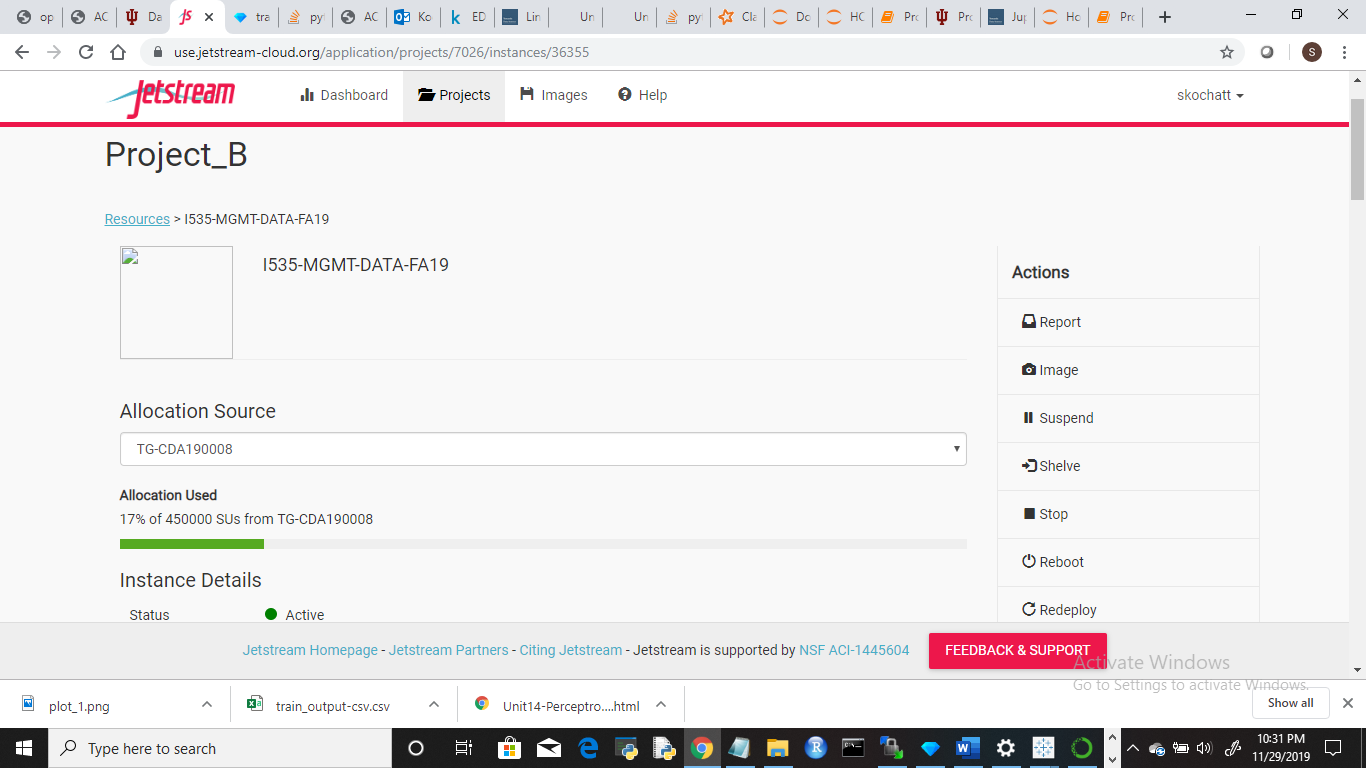

The following programs / packages were downloaded and installed:

1. MongoDB
2. Ananconda / Jupyter Notebook
3. Hadoop
4. Spark

# Storage

For downloading and storing the dataset using MongoDB, the VM was accessed remotely with WinSCP.The following steps were performed using the Putty shell: 

1. Required authentications were provided to access the database titled project B 
2. A collection titled mycol_train was created in the database
3. The dataset was downloaded from https://www.kaggle.com/c/bike-sharing-demand/data and imported into the database.
4. It was verified that 10886 rows of data was imported successfully.

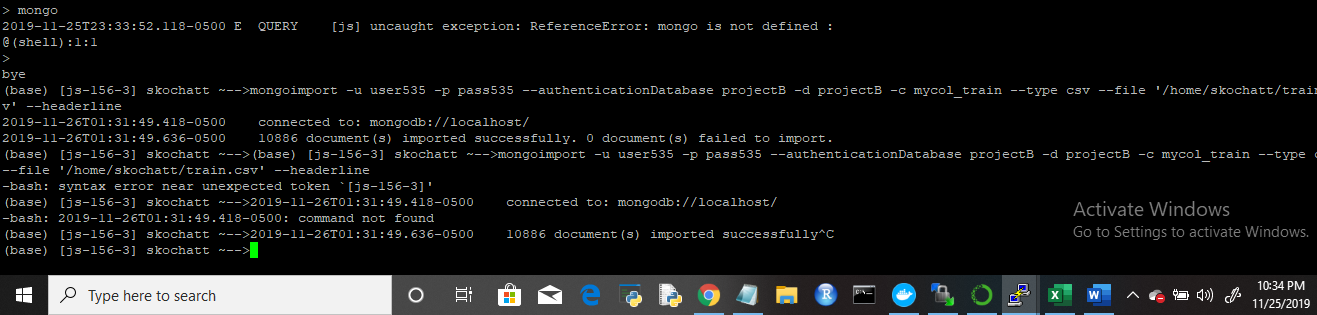

# EDA

Before exploring the dataset, we will look at what it is about as well as the details of the information it contains

About Dataset

Overview:

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

Data Fields:

1. datetime - hourly date + timestamp
2. season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
3. holiday - whether the day is considered a holiday
4. workingday - whether the day is neither a weekend nor holiday
5. weather -
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
6. temp - temperature in Celsius
7. atemp - "feels like" temperature in Celsius
8. humidity - relative humidity
9. windspeed - wind speed
10. casual - number of non-registered user rentals initiated
11. registered - number of registered user rentals initiated
12. count - number of total rentals (Dependent Variable)

A set of basic EDA steps were performed by executing MongoDB scripts on the MongoDB shell as follows:

1. Group by features such as "workingday" and "seasons" to look at the count of the individual categories within these features. 
2. The maximum and minimum values of the features were then explored to identify outliers, if any.

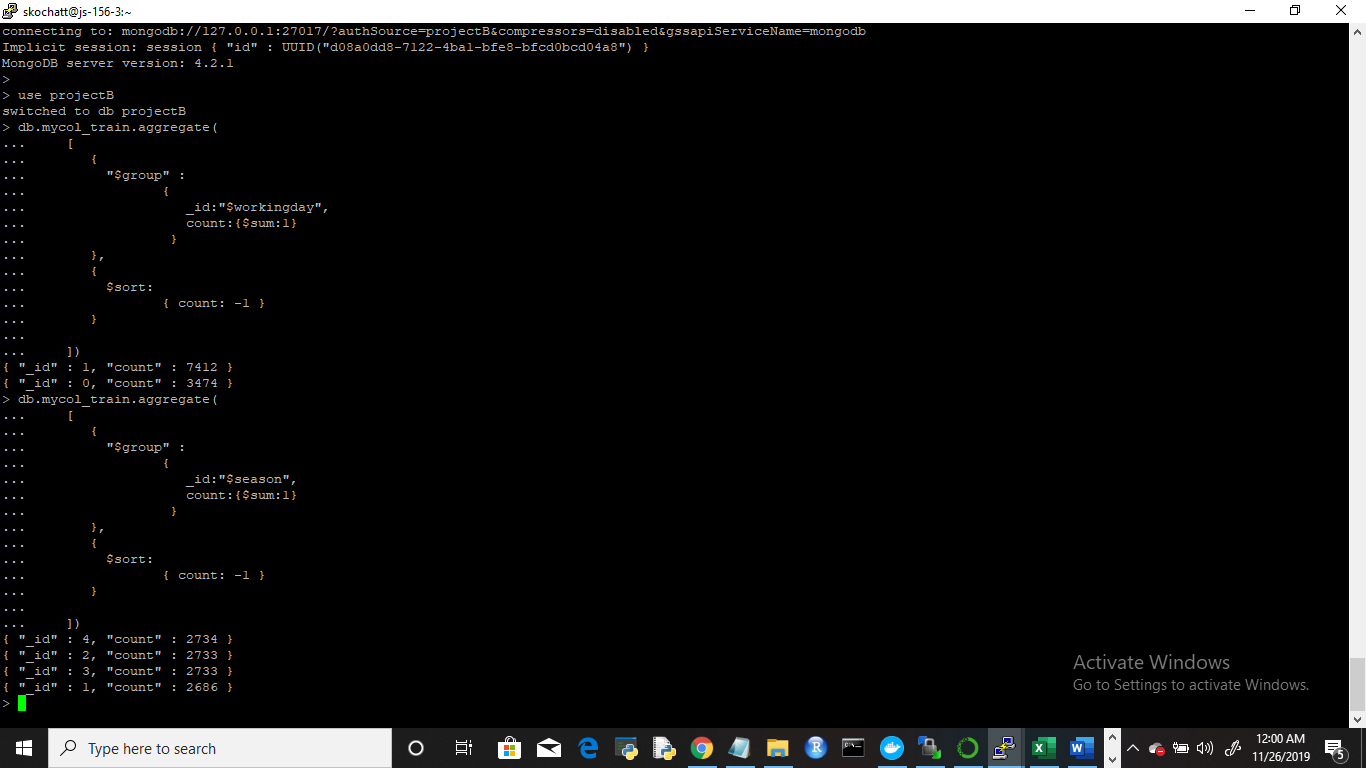

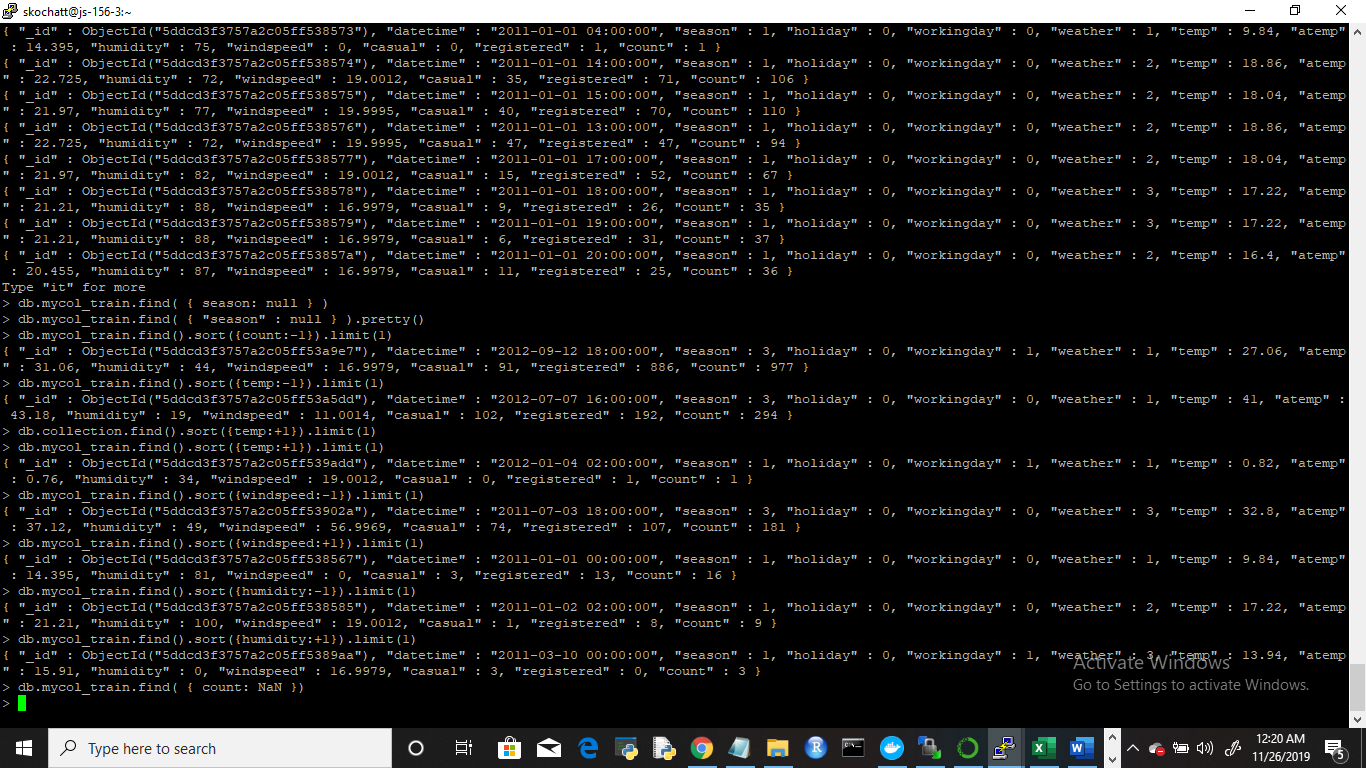

# Jupyter Notebook

## Preparing the notebook 
Download / install / import the required libraries and modules

In [2]:
#!pip install pymongo
import pymongo
from pymongo import MongoClient
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

## Setting up the required authorization to access  MongoDB database (projectB) 

In [3]:
#from pymongo import MongoClient
#import pandas as pd
myclient = MongoClient("localhost", 27017, username="user535", password="pass535", authSource="projectB")
mydb = myclient["projectB"]

In [4]:
# Checking the status of the connection
myclient

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, authsource='projectB')

# Importing the dataset from MongoDB into Jupyter Notebook 

The dataset is then brought into Jupyter Notebook as a dataframe to do clean up and further analysis

In [5]:
# Importing as a dataframe
train = pd.DataFrame(list(mydb.mycol_train.find({},{'_id': 0 })))

In [6]:
# Examining the dataset 
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
1,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
3,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
4,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


# Data cleaning

On examining the data in the dataframe imported into the Notebook, we can see that it requires some clean up. The datetime column contains many features that need to be split up into individual variables for further analysis.

To achieve this, we will use Open Refine. The dataset will first need to be exported out to Open Refine.

In [7]:
train.to_csv('train_output.csv')

## Splitting the Datetime column

The datetime column was split up using the "Edit Column" feature of Open Refine. Using a combination of splitting by separators and Regex, the following feature columns were added to the dataset

1. Year
2. Month
3. Day
4. Hour
5. Minutes
6. Seconds

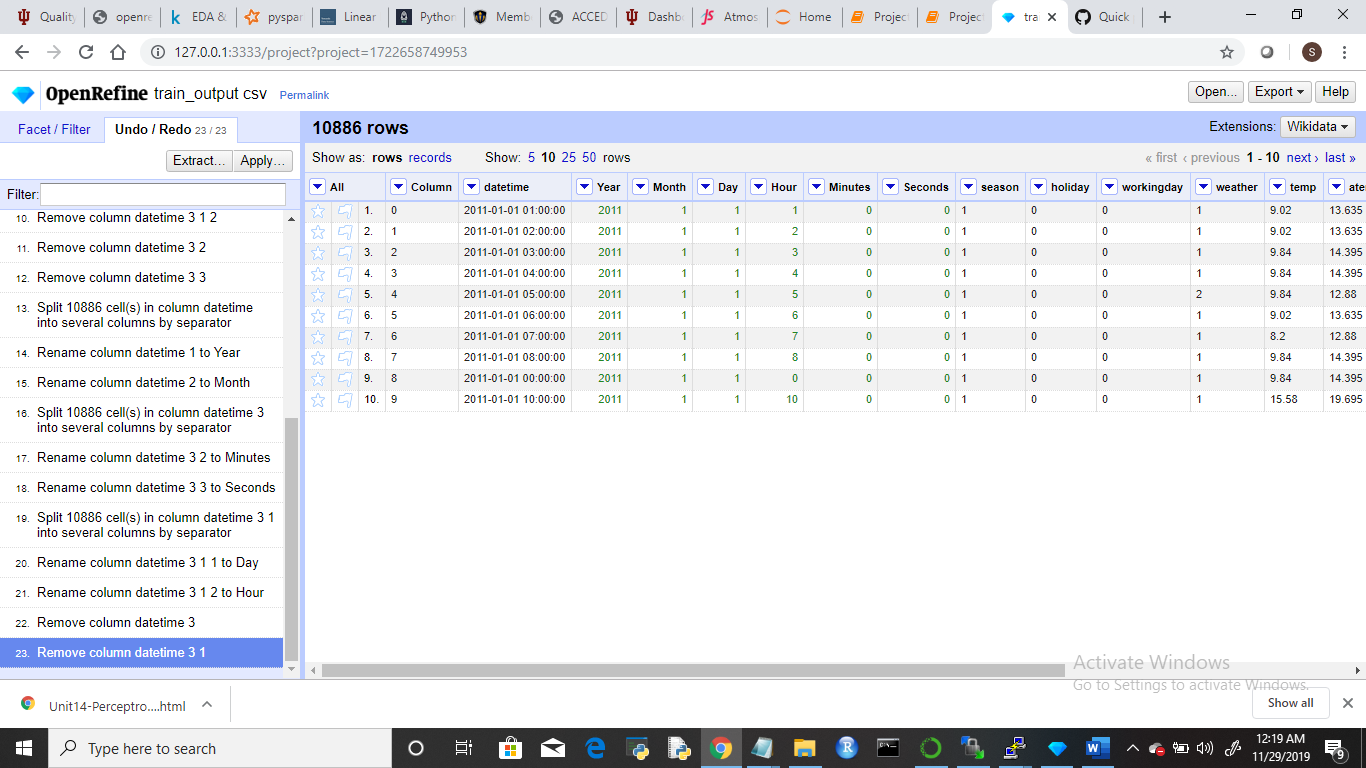

## Loading the cleaned data back

The cleaned up data was then loaded back into the Notebook for further analysis, visualization and modeling

In [7]:
# Load clean data back
train_clean_data = pd.read_csv('/home/skochatt/train_output_clean.csv')

In [8]:
# Examining the clean data
train_clean_data.head()

,Year,Month,Day,Hour,Minutes,Seconds,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,1,1,0,0,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
1,2011,1,1,2,0,0,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2,2011,1,1,3,0,0,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
3,2011,1,1,4,0,0,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
4,2011,1,1,5,0,0,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


# Data Analysis

A further set of analysis of the clean data was done to understand its size, data types, statistical distribution etc.

In [9]:
# Checking the data set shape
train_clean_data.shape

(10886, 17)

In [10]:
# Checking the data types of the columns
train_clean_data.dtypes

Year            int64
Month           int64
Day             int64
Hour            int64
Minutes         int64
Seconds         int64
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [11]:
# Checking for null values
train_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
Year          10886 non-null int64
Month         10886 non-null int64
Day           10886 non-null int64
Hour          10886 non-null int64
Minutes       10886 non-null int64
Seconds       10886 non-null int64
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(14)
memory usage: 1.4 MB


In [12]:
# Looking at the statistical distribution of the data
train_clean_data.describe()

,Year,Month,Day,Hour,Minutes,Seconds,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011.501929,6.521495,9.992559,11.541613,0.0,0.0,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,0.500019,3.444373,5.476608,6.915838,0.0,0.0,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,2011.000000,1.000000,1.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011.000000,4.000000,5.000000,6.000000,0.0,0.0,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012.000000,7.000000,10.000000,12.000000,0.0,0.0,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012.000000,10.000000,15.000000,18.000000,0.0,0.0,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012.000000,12.000000,19.000000,23.000000,0.0,0.0,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Visualization

For the purpose of diving deeper into the distribution of the data visually, the following analysis were performed:

1. Box plots for the distribution of "Count", the target variable of interest in our analysis
2. Box plot for Count across seasons 
3. Box plot for Count across the hours of the day
4. Box plot for Count between work days and holidays

Since the data is codified using numerals, we will map the same to their category descriptions as follows, for easy analysis:

In [13]:
# Map the categories 
train_clean_data["season"] = train_clean_data.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
train_clean_data["weather"] = train_clean_data.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

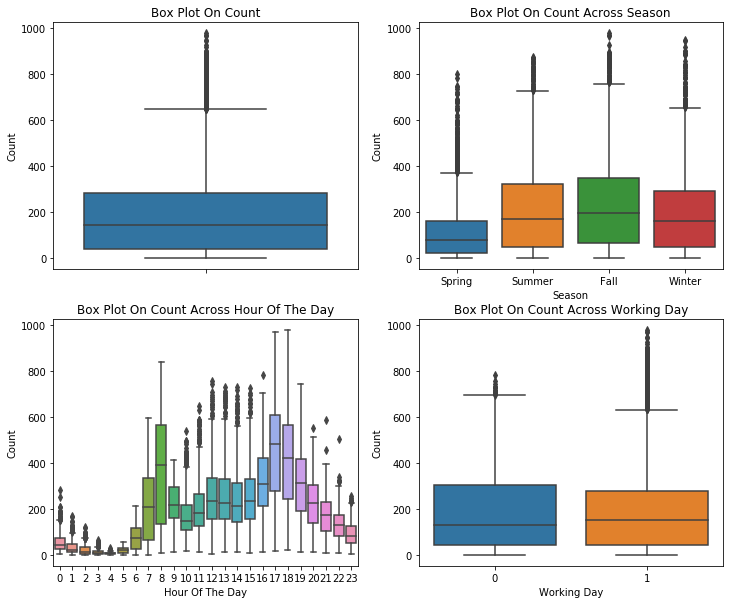

In [14]:
# Plotting the data
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=train_clean_data,y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=train_clean_data,y="count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=train_clean_data,y="count",x="Hour",orient="v",ax=axes[1][0])
sn.boxplot(data=train_clean_data,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

## Analysis:

Based on the box plots above, we can conclude the following:

1. The 25%, 50% and 75% quartiles of the count of the the rentals are 42, 145 and 284 respectively. However, there are outliers with values as low as 1 and 977, indicated by the long whiskers.
2. The season-wise count has some counter-intuitive aspects like the winter count being higher than spring. Summer count being lower than Fall was also unexpected.
3. The highest counts during the day happening at 8 am and 5 pm aligns with what one can expect from higher mobility of people at those times.
4. The higher count of working days vs holidays looked reasonable

## Additional clean up

Since we noticed some outliers during this analysis, we could remove those from the data. For this, we are removing outliers based on the logic where an observation more than 3 times the mean is considered abnormal. This will remove just 147 observations, which need not raise any concern.

In [15]:
# Removong the outliers
data_trim = train_clean_data[np.abs(train_clean_data["count"]-train_clean_data["count"].mean())<=(3*train_clean_data["count"].std())] 

In [16]:
# Printing the shape to look at the number of rows removed
print ("Shape Of The Before Ouliers: ",train_clean_data.shape)
print ("Shape Of The After Ouliers: ",data_trim.shape)

Shape Of The Before Ouliers:  (10886, 17)
Shape Of The After Ouliers:  (10739, 17)


## More visualizations on the data after outlier removal using Seaborn

We will now look at the correlation between the various features

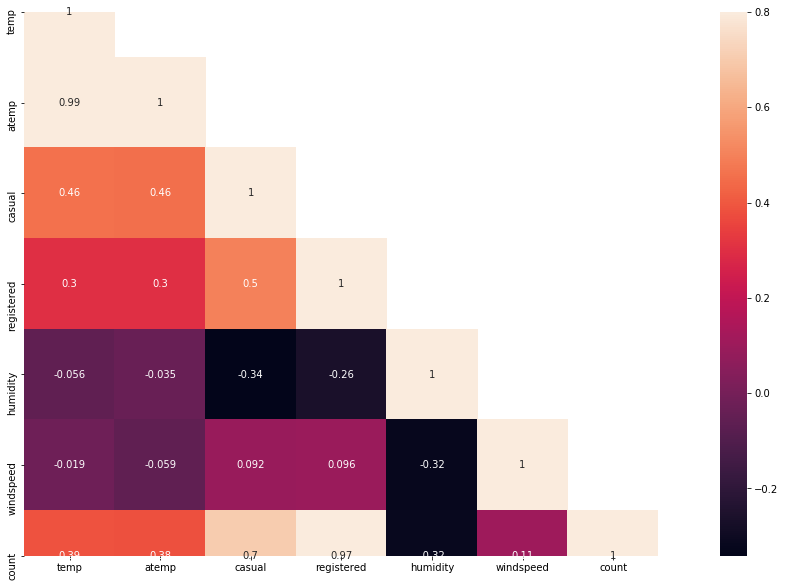

In [17]:
# Look at the correlations
corr_matrix = data_trim[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(22,10)
sn.heatmap(corr_matrix, mask=mask,vmax=.8, square=True,annot=True)

Some of the features which have higher correlations with the target variable are temperature, humidity and wind speed. The high correlations between registered, casual and count is on account of collinearity and not correlation since count = regitered + casual

Temperature is positively correlated to count whereas humidity is negative, both of which are intuitively correct.

A scatter plot of the three key features of temperature, windspeed and humidity vs count again shows a modest correlation between temperture and count.

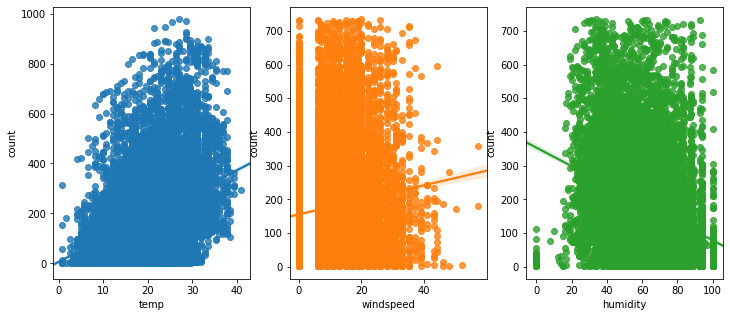

In [18]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=train,ax=ax1)
sn.regplot(x="windspeed", y="count", data=data_trim,ax=ax2)
sn.regplot(x="humidity", y="count", data=data_trim,ax=ax3)

Next, we will plot the distributions to understand how closely the data is to a normal distribution. The closer the data is to normal, the more it lends itself to machine learning based predictions.

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.348699012122978, 4.562423868087808, 0.9581176780909615))

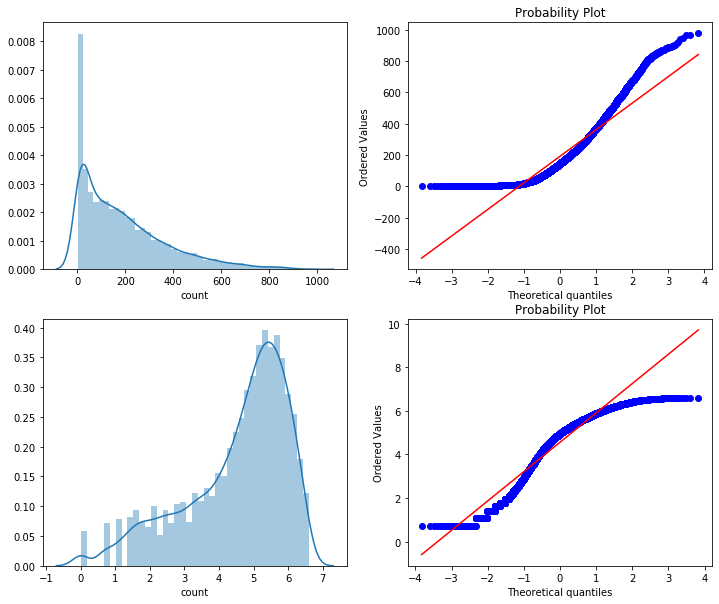

In [19]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sn.distplot(train["count"],ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
sn.distplot(np.log(data_trim["count"]),ax=axes[1][0])
stats.probplot(np.log1p(data_trim["count"]), dist='norm', fit=True, plot=axes[1][1])

As is evident from the above distribution of the "count" variable, it has a long tail to the right indicating a lot of infrequent users. To remove the skew, we tried plotting the same curve on a log scale, which brings it somewhat closer to a normal distribution.

## Visualizations using Tableau

We will now look at some trends in the data using Tableau.

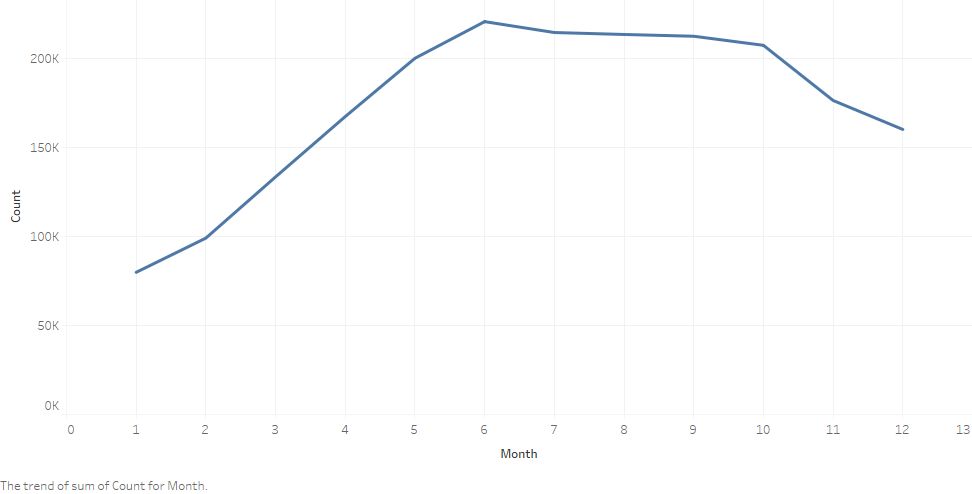

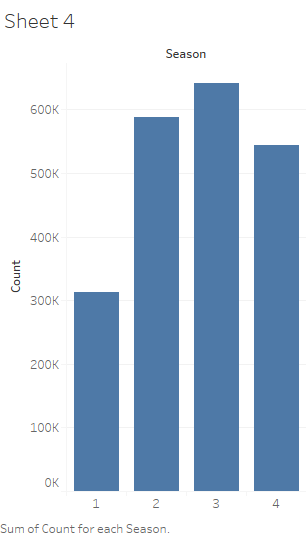

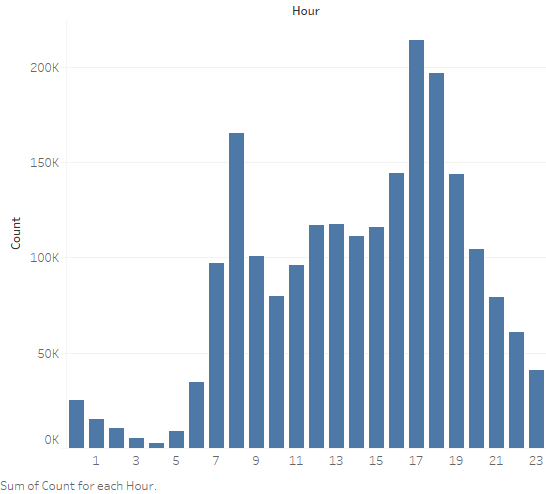

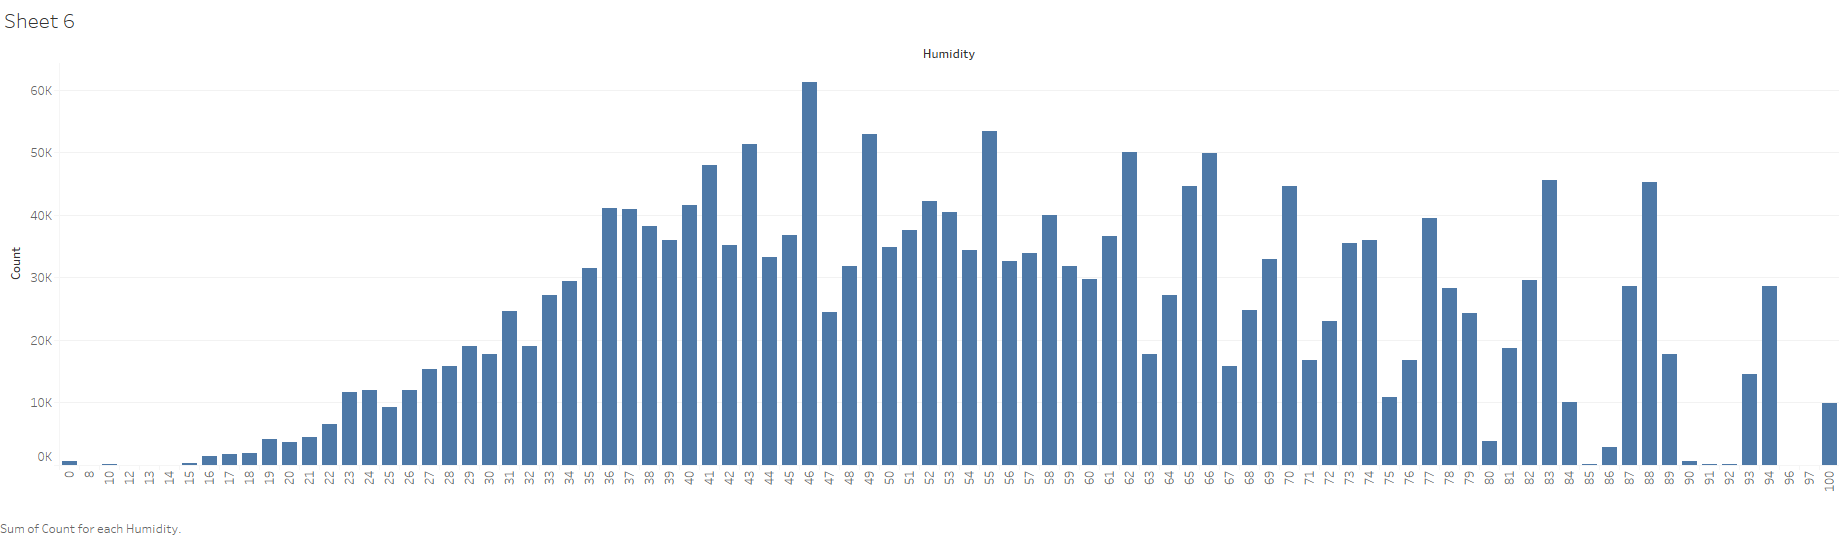

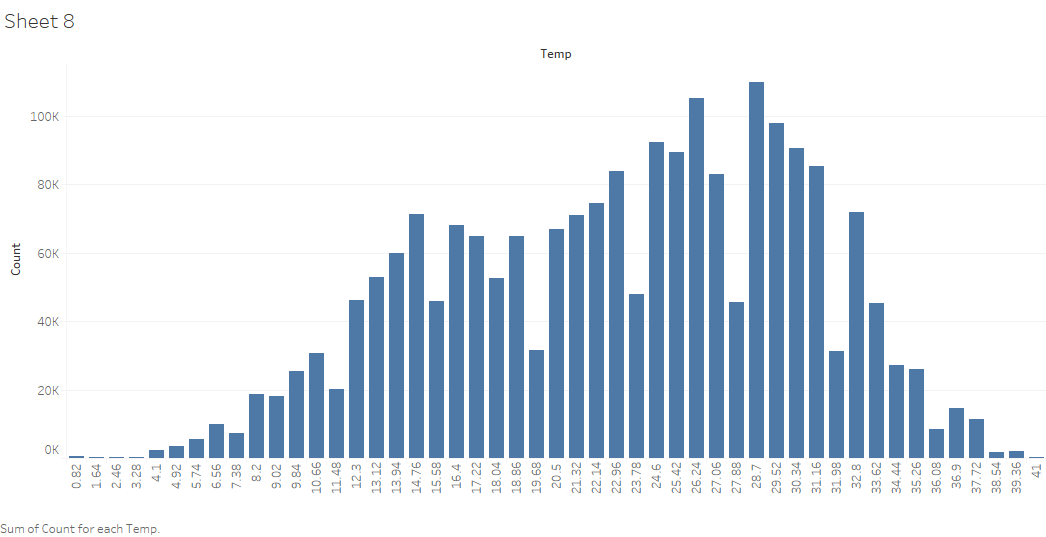

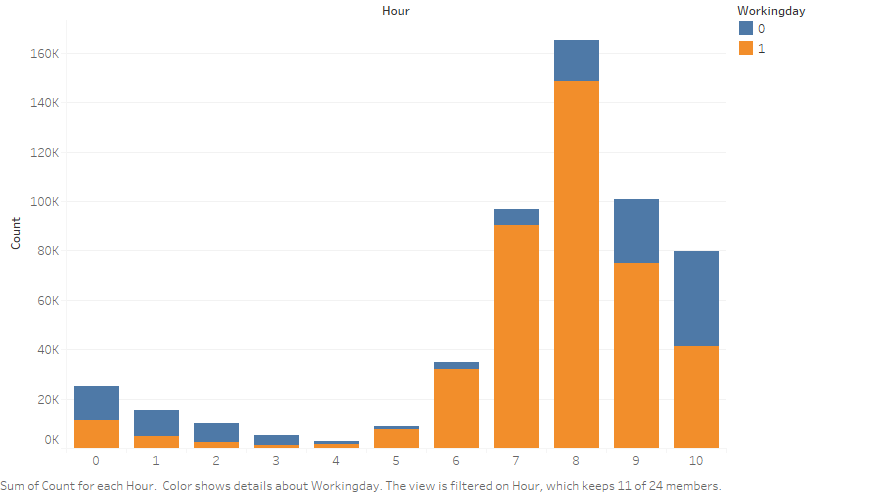

Based on the above plots, we can derive some conclusions as follows:

1. Bike rentals are high during summer and fall seasons, as expected. June, July and August have relatively higher demand for bicycle.
2. On workdays more people tend to rent bicycle around 7AM-8AM and 5PM-6PM. This can be attributed to commuters.This pattern is not observed during holidays, where more people tend to rent bicycle between 10AM and 4PM.
3. The near-normal distribution of humidity vs count is intuitive.
4. The distribution of temperature vs count seems bimodal with two peaks

# Distributed computing

We will now explore how to do our modeling and prediction based on a distributed compute model. Again, the size and scale of this dataset does not warrant such a setup. However, we have set up a Hadoop framework and implemented a Pyspark instance to do this, as a learning process. 

In [30]:
# Import and initialize Spark
import findspark
findspark.init('/opt/spark')

In [46]:
# Import SparkSession and create a SQL context
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
#sc = SparkContext()
sqlContext = SQLContext(spark)

## Loading the dataset on Spark

The pre-cleaned data from the earlier section is loaded on to a Spark instance

In [47]:
# Load data
data = spark.read.csv('./train_output_clean.csv', header=True, inferSchema=True)

In [48]:
# Check the data framework
data.show()

+----+-----+---+----+-------+-------+------+-------+----------+-------+-----+------+--------+---------+------+----------+-----+
|Year|Month|Day|Hour|Minutes|Seconds|season|holiday|workingday|weather| temp| atemp|humidity|windspeed|casual|registered|count|
+----+-----+---+----+-------+-------+------+-------+----------+-------+-----+------+--------+---------+------+----------+-----+
|2011|    1|  1|   1|      0|      0|     1|      0|         0|      1| 9.02|13.635|      80|      0.0|     8|        32|   40|
|2011|    1|  1|   2|      0|      0|     1|      0|         0|      1| 9.02|13.635|      80|      0.0|     5|        27|   32|
|2011|    1|  1|   3|      0|      0|     1|      0|         0|      1| 9.84|14.395|      75|      0.0|     3|        10|   13|
|2011|    1|  1|   4|      0|      0|     1|      0|         0|      1| 9.84|14.395|      75|      0.0|     0|         1|    1|
|2011|    1|  1|   5|      0|      0|     1|      0|         0|      2| 9.84| 12.88|      75|   6.0032| 

## Selecting the feature columns 
We will select the feature columns for modeling as well as use the Vector Assembler to assemble the input features into a single feature vector

In [49]:
# Select features and assemble
feature_columns = data.columns[:-1] 
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns,outputCol="features")

In [50]:
# Transform the dataframe using Assembler
data_2 = assembler.transform(data)

In [51]:
# Inspect the new dataframe
data_2.show()

+----+-----+---+----+-------+-------+------+-------+----------+-------+-----+------+--------+---------+------+----------+-----+--------------------+
|Year|Month|Day|Hour|Minutes|Seconds|season|holiday|workingday|weather| temp| atemp|humidity|windspeed|casual|registered|count|            features|
+----+-----+---+----+-------+-------+------+-------+----------+-------+-----+------+--------+---------+------+----------+-----+--------------------+
|2011|    1|  1|   1|      0|      0|     1|      0|         0|      1| 9.02|13.635|      80|      0.0|     8|        32|   40|[2011.0,1.0,1.0,1...|
|2011|    1|  1|   2|      0|      0|     1|      0|         0|      1| 9.02|13.635|      80|      0.0|     5|        27|   32|[2011.0,1.0,1.0,2...|
|2011|    1|  1|   3|      0|      0|     1|      0|         0|      1| 9.84|14.395|      75|      0.0|     3|        10|   13|[2011.0,1.0,1.0,3...|
|2011|    1|  1|   4|      0|      0|     1|      0|         0|      1| 9.84|14.395|      75|      0.0|   

# Modeling & Prediction

As the final step, we will create a Linear Regression model and use the dataset features and target variable to train the model. We will, subsequently, leverage the model to predict the target value of the test data set. We will also examine some of the metrics that captures the accuracy of the prediction model.

In [52]:
# Splitting the datset into train and test
train, test = data_2.randomSplit([0.7, 0.3])

In [53]:
# Import Linear Regression module
from pyspark.ml.regression import LinearRegression

In [54]:
algo = LinearRegression(featuresCol="features", labelCol="count")

In [55]:
# Create a model and fit the training dataset
model = algo.fit(train)

In [73]:
# Evaluate the performance of the model using the test dataset
evaluation_summary = model.evaluate(test)

We can see that the model predicts with a remarkably high level of accuracy of close to 100%.

In [77]:
evaluation_summary.r2

0.9999999999999849

We will further explore some more metrics relating to the accuracy of the model

In [75]:
evaluation_summary.meanAbsoluteError

1.7746837438973255e-05

In [76]:
evaluation_summary.rootMeanSquaredError

2.2317739522578828e-05

We will now look at how close the predictions were to the corresponding actual values

In [78]:
predictions = model.transform(test)

In [79]:
predictions.select(predictions.columns[16:]).show()

+-----+--------------------+------------------+
|count|            features|        prediction|
+-----+--------------------+------------------+
|   32|[2011.0,1.0,1.0,2...| 32.00001836870112|
|    2|[2011.0,1.0,1.0,6...|2.0000218320941516|
|    3|[2011.0,1.0,1.0,7...|3.0000275049341236|
|   14|[2011.0,1.0,1.0,9...|14.000022869320134|
|   84|[2011.0,1.0,1.0,1...| 84.00003023564422|
|  106|[2011.0,1.0,1.0,1...|106.00001997568002|
|   35|[2011.0,1.0,1.0,1...|35.000026082844585|
|   28|[2011.0,1.0,1.0,2...|  28.0000428821686|
|   17|[2011.0,1.0,2.0,0...| 17.00002231197218|
|    3|[2011.0,1.0,2.0,4...|3.0000306312258553|
|   53|[2011.0,1.0,2.0,1...|  53.0000010252631|
|   22|[2011.0,1.0,2.0,2...|22.000005828025632|
|    2|[2011.0,1.0,3.0,1...|2.0000085093407725|
|   44|[2011.0,1.0,3.0,1...| 44.00001067303173|
|   61|[2011.0,1.0,3.0,1...|61.000004793984374|
|  157|[2011.0,1.0,3.0,1...|156.99999578834266|
|    4|[2011.0,1.0,4.0,5...| 4.000022949409672|
|  100|[2011.0,1.0,4.0,9...|100.00002430

Finally, we will look at some of the key performance indicators of our model like Coefficients and the Intercept.

In [80]:
print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))

Coefficients: [6.923547485098727e-06,-1.7912040421815133e-05,-1.3352184363172504e-07,6.789547436312447e-07,0.0,0.0,5.2867471291055864e-05,2.146455701875598e-05,7.379985624498971e-06,-8.035686955535174e-06,3.885175397725829e-06,-3.699786668872934e-06,9.469624801635535e-07,3.9945921960324786e-08,1.0000001963709224,0.9999999504930805]
Intercept: -0.01399302928002927


In [81]:
# Summarize the model over the training set and print out some metrics
trainingSummary = model.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

numIterations: 31
objectiveHistory: [0.5, 0.38469827801368583, 0.054807598439011285, 0.03227800152886462, 0.002982690499790719, 0.0008344427048594394, 0.00023704470995578042, 0.00011154571165605809, 6.344775541333725e-05, 5.7485857347661096e-06, 7.483155668452923e-07, 4.2872532723947643e-07, 3.6534808200983093e-07, 3.434669020307979e-07, 2.3991231667963575e-07, 1.5722568091902644e-07, 6.332999924474336e-08, 1.7141292163458388e-08, 1.2071093680177114e-08, 1.137777227988579e-08, 1.057230192280656e-08, 9.224244923444758e-09, 6.560717080716927e-09, 2.6468127689582843e-09, 1.3043910396248748e-09, 5.808065139945029e-11, 1.6129320101754274e-12, 6.916689443414725e-13, 9.170442183403793e-14, 3.930189507173054e-14, 7.549516567451064e-15]
+--------------------+
|           residuals|
+--------------------+
|-1.86321150970059...|
|-1.80313245436991...|
|-1.51357252047290...|
|-1.56711294569955...|
|-1.41593774070081...|
|-1.82862778359549...|
|-2.52806465468324...|
|-4.12510985299263...|
|-2.28812

In [82]:
print('Rsquared Error :',evaluation_summary.r2) 
#R2 value shows accuracy of model is 99% 
#model accuracy is very good and can be use for predictive analysis

Rsquared Error : 0.9999999999999849


Overall, we can see that the model performs extremely well even without much tuning of the hyper-parameters

# Results

As mentioned in the introduction to this project, the objective was to apply the skills learned in the course of this semester as well as from other related courses. Towards that objective, this project offered considerable opportunity to apply multiple tools and technologies. 

Equally significant is the fact that the model created here, despite its simplicity and lack of optimization, offers a high level of accuracy for prediction of the target variable.

Most of the revealations from the EDA and visualizations were in line with intuitions, although some of them were unexpected.

# Discussion

This project, despite its apparent simplicity, provided ample opportunity to augment the learnings from the course material with practical applications of the same. In the process of implementing this project, a wide range of tools and technologies were leveraged. 

The creation of a container on Jetstream and loading multiple programs like MongoDB, Ananconda, Hadoop and Spark provided considerable opportunity to become hands-on with virtualization technologies.

Data cleaning using Open Refine, though of limited scope in this project, provided insight into its potential applications on a wider scale.

While the size of the dataset does not necessarily warrant the use of distributed computing, exploring Spark as part of this project in combination with its machine learning libraries was extremely useful for deploying the same for larger projects, going forward.

During the course of implementing this project, some hurdles were encountered. The stated goal of maximally utilizing the learnings demanded thinking out-of-the-box. Tasks like installing the programs in the VMs to configuring Jupyter Notebook involved multiple trial and error iterations which provided rich learning opportunities. Setting up the Spark instance and running a machine learning model on the same was reinforcing the learnings in the course as well.

# Data Management
The data management plan for this project will include the following:
1. Collection of data: Data relating to bike usage will need to be collected from the bike stations / docks which will record the starting time and end time of usage. Data relating to weather could be collected from metereological sources.
2. Storage & Preservation: In the setting of the current project, data could be stored and preserved in a secure and scaleable manner in the MongoDB database. An upload cycle could be established for new data, a process for which could be automated

# Conclusion

During the course of this project, a number of course corrections were made to ensure that the stated goals were met. Although simple in scope, the hands-on experience with multiple tools employed in this project reinforced the theoretical aspects of the course material. The experience gained during this project will undoubtedly help in taking on larger and more complex projects.

# Reference

https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile#About-Dataset